In [0]:
from google.colab import drive
from google.colab import files
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.resnet import ResNet152, preprocess_input
from sklearn.model_selection import train_test_split
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential, Model
from keras.utils import np_utils
from keras.optimizers import Adam
from keras import regularizers

Using TensorFlow backend.


In [0]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
DATA_PATH = 'drive/My Drive/flower-recognition-he/data/'

In [0]:
d = pd.read_csv(DATA_PATH + 'train.csv').values[:,1]

In [0]:
def load_data():
  
  data = (pd.read_csv(DATA_PATH + 'train.csv')).values
  
  X = []
  Y = []
  
  images = os.listdir(DATA_PATH + 'train')
  
  for i in tqdm(data):
    
    try:
      
       ci = cv2.imread(DATA_PATH + 'train/' + str(i[0]) + '.jpg')
    
       ci2 = cv2.resize(ci, (224,224))
    
       X.append(ci2)
    
       Y.append(i[1]-1)
      
    except:
      
      continue
    
  return X,Y
    

In [0]:
X, Y = load_data()

100%|██████████| 18540/18540 [54:07<00:00,  5.71it/s] 


In [0]:
X = np.array(X)
Y = np.array(Y)

In [0]:
print(X.shape, Y.shape)

(6232, 224, 224, 3) (6232,)


In [0]:
X2 = []
Y2 = []
for i in tqdm(range(X.shape[0])):
  
  M = cv2.getRotationMatrix2D((224/2,224/2),90,1)
  dst = cv2.warpAffine(X[i],M,(224,224))
  X2.append(dst)
  Y2.append(Y[i])

100%|██████████| 6232/6232 [00:02<00:00, 2708.09it/s]


In [0]:
X3 = []
Y3 = []
for i in tqdm(range(X.shape[0])):
  
  M = cv2.getRotationMatrix2D((224/2,224/2),180,1)
  dst = cv2.warpAffine(X[i],M,(224,224))
  X3.append(dst)
  Y3.append(Y[i])

100%|██████████| 6232/6232 [00:02<00:00, 2626.41it/s]


In [0]:
X4 = np.concatenate((X,X2),axis = 0)

In [0]:
Y4 = np.concatenate((Y,Y2), axis = 0)

In [0]:
X5 = np.concatenate((X4,X3),axis = 0)

In [0]:
Y5 = np.concatenate((Y4,Y3),axis = 0)

In [0]:
Y5 = np_utils.to_categorical(Y5)

In [0]:
X_train, X_test, Y_train, Y_test = np.array(train_test_split(X5,Y5, test_size = 0.2))

(18696, 102)

In [0]:
vgg19_model = VGG19(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

In [0]:
for l in vgg19_model.layers:
  l.trainable= False

In [0]:
fc_layers = Sequential()
fc_layers.add( Flatten( input_shape = vgg19_model.layers[-1].output_shape[1:] ) )
fc_layers.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
fc_layers.add(Dense(102, activation = 'softmax',kernel_regularizer=regularizers.l2(0.01)))

NameError: ignored

In [0]:
VGG_Model = Sequential([vgg19_model, fc_layers])

NameError: ignored

In [0]:
VGG_Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
sequential_1 (Sequential)    (None, 102)               3224550   
Total params: 23,248,934
Trainable params: 3,224,550
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
VGG_Model.compile(optimizer = Adam(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history_vgg = VGG_Model.fit(X_train, Y_train, batch_size = 1, epochs = 15, validation_data = [X_test, Y_test], shuffle = True)

Train on 10594 samples, validate on 1870 samples
Epoch 1/15
  412/10594 [>.............................] - ETA: 2:52 - loss: 4.6552 - acc: 0.0850

KeyboardInterrupt: ignored

In [0]:
new_data = []

In [0]:
for i in range(d1.shape[0]):
  new_data.append('' + str(d1[i]) +'.jpg')

In [0]:
new_data[:10]

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg']

In [0]:
d2 = np.sort(new_data)

In [0]:
d2[:10]

array(['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg',
       '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg'], dtype='<U9')

In [0]:
 resnet_model = ResNet152(input_shape = (224,224,3), include_top = False, weights= 'imagenet')








234700800/234698864 [==============================] - 7s 0us/step


In [0]:
for l in resnet_model.layers:
  l.trainable= False

In [0]:
fc_layers = Sequential()
fc_layers.add( Flatten( input_shape = resnet_model.layers[-1].output_shape[1:] ) )
fc_layers.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
fc_layers.add(Dropout(0.2))
fc_layers.add(Dense(102, activation = 'softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
RESNET_MODEL = Sequential([resnet_model, fc_layers])

In [0]:
RESNET_MODEL.compile(optimizer = Adam(0.00001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
rh = RESNET_MODEL.fit(X_train, Y_train, batch_size = 20, epochs = 200, validation_data = [X_test, Y_test], shuffle = True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 14956 samples, validate on 3740 samples
Epoch 1/200
14956/14956 [==============================] - 193s 13ms/step - loss: 6.0749 - acc: 0.2284 - val_loss: 5.6488 - val_acc: 0.2957
Epoch 2/200
14956/14956 [==============================] - 182s 12ms/step - loss: 3.7471 - acc: 0.6782 - val_loss: 5.0089 - val_acc: 0.4184
Epoch 3/200
14956/14956 [==============================] - 182s 12ms/step - loss: 2.8919 - acc: 0.8683 - val_loss: 4.5177 - val_acc: 0.4930
Epoch 4/200
14956/14956 [==============================] - 182s 12ms/step - loss: 2.5529 - acc: 0.9408 - val_loss: 4.5115 - val_acc: 0.4840
Epoch 5/200
14956/14956 [==============================] - 182s 12ms/step - loss: 2.3640 - acc: 0.9691 - val_loss: 4.2209 - val_acc: 0.5321
Epoch 6/200
14956/14956 [==============================] - 182s 12ms/step - loss: 2.2187 - acc: 0.9787 - val_loss: 4.0541 - val_acc: 0.5414
Epoch 7/200
14956

In [0]:
                                                                    resnet_model.save('resnet.h5')

KeyboardInterrupt: ignored

In [0]:
test_images = os.listdir(DATA_PATH + 'test')

In [0]:
ti = []

r =np.arange(18540, 20549)

In [0]:
r

array([18540, 18541, 18542, ..., 20546, 20547, 20548])

In [0]:
test_images

[]

In [0]:
test_folder = os.listdir('drive/My Drive/FR/data/test')

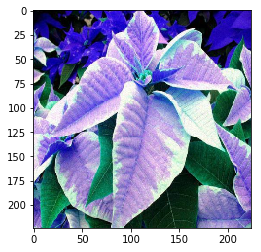

In [0]:
ti = cv2.imread('drive/My Drive/FR/data/test/' + test_folder[3])
ti = cv2.resize(ti,(224,224))
plt.imshow(ti)

In [0]:
predictions = RESNET_MODEL.predict(np.array([ti]))

In [0]:
a = predictions.argmax() + 
a

43

In [0]:
preds = []

In [0]:
for i in tqdm(r):
  
  ci = cv2.imread('drive/My Drive/FR/data/test/' + str(i) + '.jpg')
  
  ci = cv2.resize(ci, (224,224))
  
  cp = RESNET_MODEL.predict(np.array([ci]))
  
  ans = cp.argmax() + 1
  
  preds.append(ans)

100%|██████████| 2009/2009 [19:27<00:00,  1.66it/s]


In [0]:
preds = np.array(preds)

In [0]:
preds2 = np.reshape(preds, (2009,1))

In [0]:
r2 = np.reshape(r, (2009,1))

In [0]:
d = np.concatenate((r2,preds2), axis = 1)

In [0]:
d[:10]

array([[18540,    98],
       [18541,     1],
       [18542,    76],
       [18543,    72],
       [18544,    51],
       [18545,    76],
       [18546,    67],
       [18547,    51],
       [18548,    72],
       [18549,    89]])

In [0]:
RESULT = pd.DataFrame(d, columns = ['image_id', 'category'])

In [0]:
RESULT.head(n=5)

,image_id,category
0,18540,98
1,18541,1
2,18542,76
3,18543,72
4,18544,51


In [0]:
RESULT.to_csv('SUBMISSION2.csv',index = None)

In [0]:
!ls

drive  resnet.h5  sample_data  SUBMISSION2.csv	SUBMISSION.csv


In [0]:
from google.colab import files
files.download('SUBMISSION2.csv')

In [0]:
!mkdir all_models

In [0]:
for i in range(1,76):
  
  rh = RESNET_MODEL.fit(X_train, Y_train, batch_size = 20, epochs = 1, validation_data = [X_test, Y_test], shuffle = True)
  
  if(i>=50):
    
    RESNET_MODEL.save('all_models/model' + str(i) + '.h5')

Train on 14956 samples, validate on 3740 samples
Epoch 1/1
14956/14956 [==============================] - 192s 13ms/step - loss: 2.3338 - acc: 0.9719 - val_loss: 4.3202 - val_acc: 0.5449
Train on 14956 samples, validate on 3740 samples
Epoch 1/1
14956/14956 [==============================] - 194s 13ms/step - loss: 2.1884 - acc: 0.9819 - val_loss: 4.3153 - val_acc: 0.5278
Train on 14956 samples, validate on 3740 samples
Epoch 1/1
14956/14956 [==============================] - 195s 13ms/step - loss: 2.0461 - acc: 0.9878 - val_loss: 4.0659 - val_acc: 0.5500
Train on 14956 samples, validate on 3740 samples
Epoch 1/1
14956/14956 [==============================] - 198s 13ms/step - loss: 1.9027 - acc: 0.9903 - val_loss: 3.8802 - val_acc: 0.5676
Train on 14956 samples, validate on 3740 samples
Epoch 1/1
14956/14956 [==============================] - 198s 13ms/step - loss: 1.7536 - acc: 0.9924 - val_loss: 3.7031 - val_acc: 0.5607
Train on 14956 samples, validate on 3740 samples
Epoch 1/1
14956/

In [0]:
for i in tqdm(r):
  
  ci = cv2.imread('drive/My Drive/FR/data/test/' + str(i) + '.jpg')
  
  ci = cv2.resize(ci, (224,224))
  
  cp = RESNET_MODEL.predict(np.array([ci]))
  
  ans = cp.argmax() + 1
  
  preds.append(ans)

NameError: ignored